## Natural Language Processing (NLP)

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn import preprocessing
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

### Import Dataset

In [2]:
df = pd.read_csv('bbc-text.csv')
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


### Extract the first five data

In [3]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


### Extract the first five data

In [4]:
df.tail()

,category,text
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...
2224,sport,souness delight at euro progress boss graeme s...


In [5]:
df.shape

(2225, 2)

### Create Category id column

In [6]:
df['cat_id'] = df.category.factorize()[0]

In [7]:
df

,category,text,cat_id
0,tech,tv future in the hands of viewers with home th...,0
1,business,worldcom boss left books alone former worldc...,1
2,sport,tigers wary of farrell gamble leicester say ...,2
3,sport,yeading face newcastle in fa cup premiership s...,2
4,entertainment,ocean s twelve raids box office ocean s twelve...,3
...,...,...,...
2220,business,cars pull down us retail figures us retail sal...,1
2221,politics,kilroy unveils immigration policy ex-chatshow ...,4
2222,entertainment,rem announce new glasgow concert us band rem h...,3
2223,politics,how political squabbles snowball it s become c...,4


In [8]:
df.shape

(2225, 3)

In [9]:
print('Total row: {}'.format(df.shape[0]))
print('Total new column: {}'.format(df.shape[1]))

Total row: 2225
Total new column: 3


In [10]:
df_id = df[['category', 'cat_id']].drop_duplicates().sort_values(by = 'cat_id').reset_index(drop = 1)
df_id

,category,cat_id
0,tech,0
1,business,1
2,sport,2
3,entertainment,3
4,politics,4


### Categories in the dataset

In [11]:
df['category'].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [12]:
counter = 0
for num, cat in enumerate(df['category'].unique()):
    counter += 1
    #print(num + 1, ':', cat)
    print('{}: {}'.format(num+1, cat))
print('There are {} unique categories'.format(counter))

1: tech
2: business
3: sport
4: entertainment
5: politics
There are 5 unique categories


### Countplot category

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'tech'),
  Text(1, 0, 'business'),
  Text(2, 0, 'sport'),
  Text(3, 0, 'entertainment'),
  Text(4, 0, 'politics')])

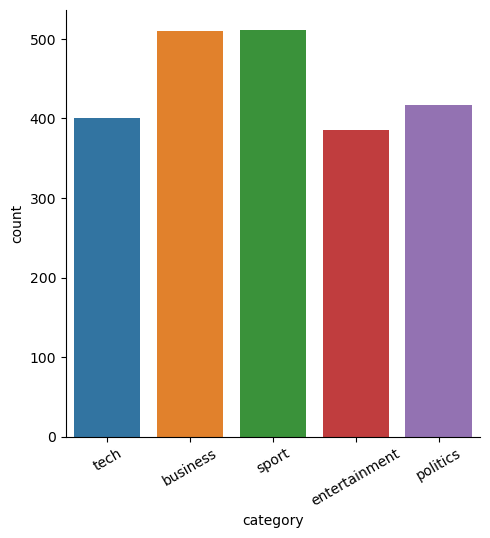

In [13]:
sns.catplot(x = 'category', data = df, kind = 'count' )
plt.xticks(rotation=30)

### Datatype of each column

In [14]:
df.dtypes

category    object
text        object
cat_id       int64
dtype: object

### Check for missing values

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
 2   cat_id    2225 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 52.3+ KB


In [16]:
df.isna().sum()

category    0
text        0
cat_id      0
dtype: int64

No missing data

### Check the total number of words in each text

In [17]:
df['length_news'] = df['text'].str.len()
df['length_news']

0       4333
1       1842
2       1342
3       2176
4       1579
        ... 
2220    1745
2221     955
2222    1648
2223    4684
2224    1167
Name: length_news, Length: 2225, dtype: int64

In [18]:
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

C:\Users\Saheed\AppData\Local\Temp\ipykernel_11516\2334623236.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['length_news'], kde=False, color='purple', bins=30)


Text(0.5, 1.0, 'Length Distribution')

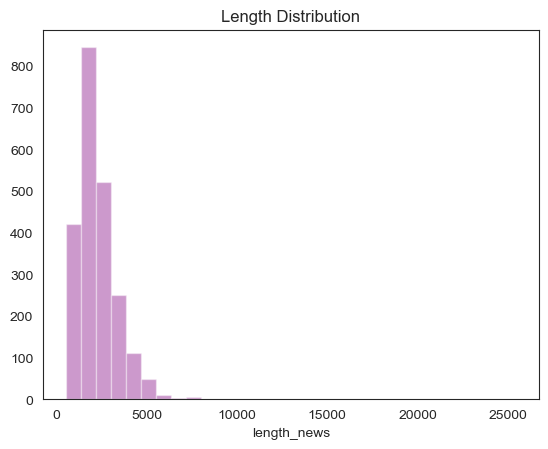

In [19]:
sns.set_style('white')
sns.distplot(df['length_news'], kde=False, color='purple', bins=30)
plt.title('Length Distribution')

## Word Cloud

A function to generate the word cloud from text

In [20]:
def word_cloud(words, title):
    cloud = WordCloud(width=800, 
                      height=600, 
                      random_state=20,
                      background_color='black',
                      max_font_size=120).generate(words)
    plt.figure(figsize=(10, 8))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for '+ title.title(), fontsize=18)
    plt.margins(x=0, y=0)
    plt.show()

### Most frequent words used in sport

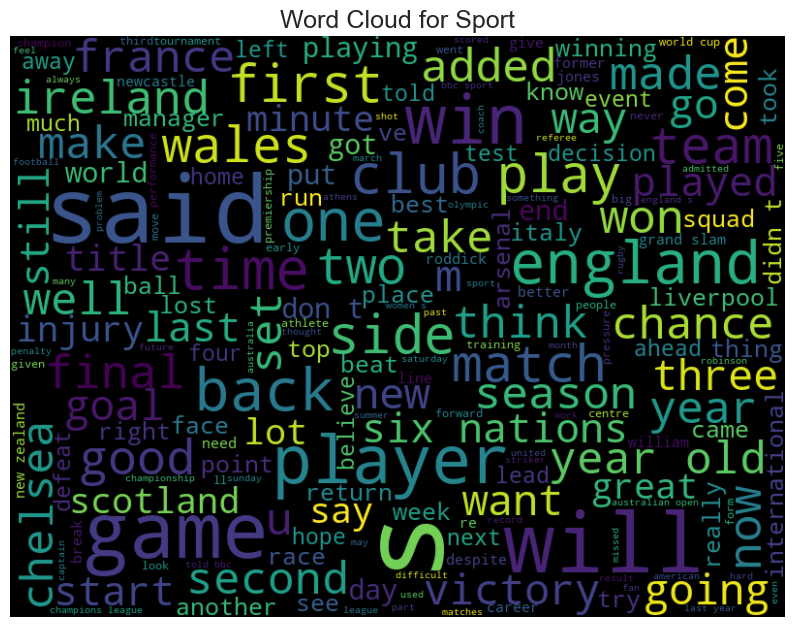

In [21]:
subset = df[df.category=='sport']
txt = subset.text.values
words = ' '.join(txt)
word_cloud(words, 'sport')

### Most frequent words used in business

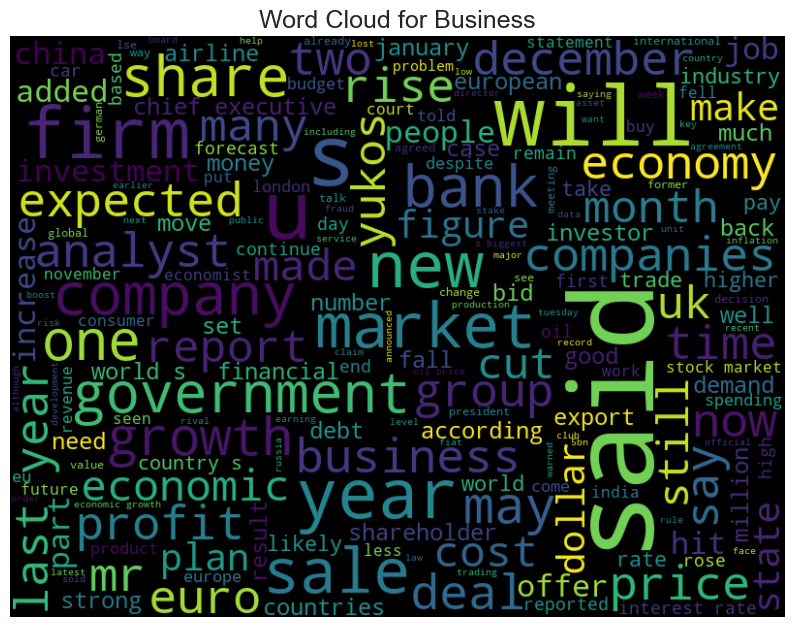

In [22]:
subset = df[df.category=='business']
txt = subset.text.values
words = ' '.join(txt)
word_cloud(words, 'business')

### Most frequent words used in entertainment

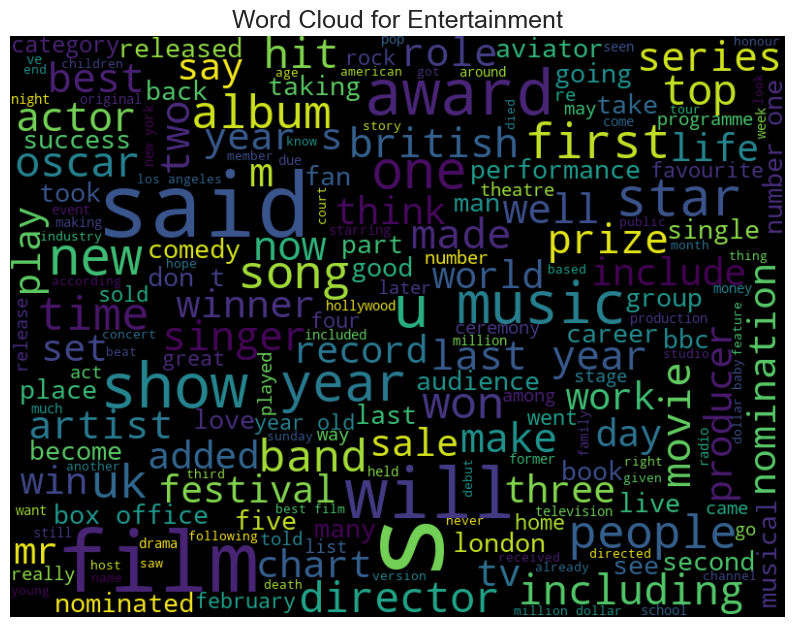

In [23]:
subset = df[df.category=='entertainment']
txt = subset.text.values
words = ' '.join(txt)
word_cloud(words, 'entertainment')

### Most frequent words used in politics

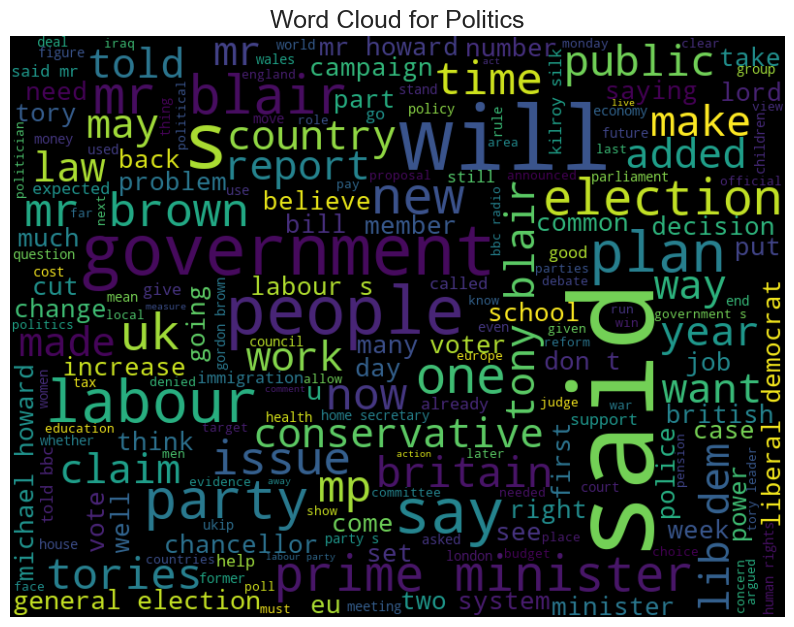

In [24]:
subset = df[df.category=='politics']
txt = subset.text.values
words = ' '.join(txt)
word_cloud(words, 'politics')

### Most frequent words used in tech

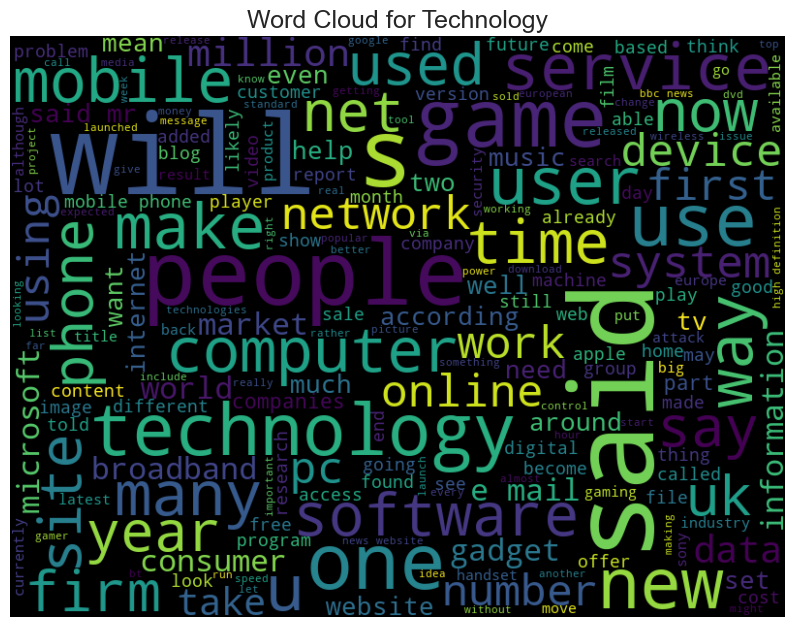

In [25]:
subset = df[df.category=='tech']
txt = subset.text.values
words = ' '.join(txt)
word_cloud(words, 'technology')

In [26]:
#nltk.download('stopwords')

### Data Cleaning

In [27]:
def clean_data(text):
    txt = text.lower().replace('\n', ' ').replace('\r', '').strip()
    txt = re.sub(' +', ' ', txt)
    txt = re.sub(r'[^\w\s]', '', txt)
    
    stopword = set(stopwords.words('english'))
    wordtokens = word_tokenize(txt)
    #clean_sentence = [word for word in wordtokens if word not in stopword]
    clean_sentence = []
    for word in wordtokens:
        if word not in stopword:
            clean_sentence.append(word)
    
    txt = ' '.join(clean_sentence)
    return txt

In [28]:
df['Text_parsed'] = df['text'].apply(clean_data)

In [29]:
df

,category,text,cat_id,length_news,Text_parsed
0,tech,tv future in the hands of viewers with home th...,0,4333,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldc...,1,1842,worldcom boss left books alone former worldcom...
2,sport,tigers wary of farrell gamble leicester say ...,2,1342,tigers wary farrell gamble leicester say rushe...
3,sport,yeading face newcastle in fa cup premiership s...,2,2176,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,3,1579,ocean twelve raids box office ocean twelve cri...
...,...,...,...,...,...
2220,business,cars pull down us retail figures us retail sal...,1,1745,cars pull us retail figures us retail sales fe...
2221,politics,kilroy unveils immigration policy ex-chatshow ...,4,955,kilroy unveils immigration policy exchatshow h...
2222,entertainment,rem announce new glasgow concert us band rem h...,3,1648,rem announce new glasgow concert us band rem a...
2223,politics,how political squabbles snowball it s become c...,4,4684,political squabbles snowball become commonplac...


### Label Encoding

In [30]:
label_encoder = preprocessing.LabelEncoder()
df['cat_target'] = label_encoder.fit_transform(df['category'])

In [31]:
df.head()

,category,text,cat_id,length_news,Text_parsed,cat_target
0,tech,tv future in the hands of viewers with home th...,0,4333,tv future hands viewers home theatre systems p...,4
1,business,worldcom boss left books alone former worldc...,1,1842,worldcom boss left books alone former worldcom...,0
2,sport,tigers wary of farrell gamble leicester say ...,2,1342,tigers wary farrell gamble leicester say rushe...,3
3,sport,yeading face newcastle in fa cup premiership s...,2,2176,yeading face newcastle fa cup premiership side...,3
4,entertainment,ocean s twelve raids box office ocean s twelve...,3,1579,ocean twelve raids box office ocean twelve cri...,1


In [32]:
df.to_csv('Preprocessed_bbc_news.csv')

### Splitting data into training and testing

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df['Text_parsed'],
                                                    df['cat_target'],
                                                    test_size=0.2,
                                                    random_state=80
                                                   )

In [34]:
X_train.head()

1845    rescue hope borussia dortmund shares strugglin...
1155    bid cut court witness stress new targets reduc...
1511    dogged federer claims dubai crown world number...
1904    half measures halflife 2 could halflife 2 poss...
1541    pete doherty misses bail deadline singer pete ...
Name: Text_parsed, dtype: object

In [35]:
print('Total train size: {}'.format(X_train.shape[0]))

Total train size: 1780


In [36]:
X_test.shape

(445,)

In [37]:
print('Total test size: {}'.format(X_test.shape[0]))

Total test size: 445


In [38]:
X_train.shape[0] + X_test.shape[0]

2225

In [39]:
ngram_range = (1, 2)
min_df = 10
max_df = 1.
max_features = 300

In [40]:
tfidf = TfidfVectorizer(encoding='utf-8',
                       ngram_range=ngram_range,
                       stop_words=None,
                       lowercase=False,
                       max_df=max_df,
                       min_df=min_df,
                       max_features=max_features,
                       norm='l2',
                       sublinear_tf=True)
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
features_test = tfidf.transform(X_test).toarray()
labels_test = y_test

In [41]:
labels_train.shape

(1780,)

In [42]:
labels_test.shape

(445,)

In [43]:
features_train.shape

(1780, 300)

In [44]:
features_test.shape

(445, 300)

## Building Models

### Random Forest Regression

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
model = RandomForestClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy:', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy: 0.9168539325842696
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        99
           1       0.94      0.78      0.86        83
           2       0.91      0.98      0.94        83
           3       0.92      0.96      0.94       103
           4       0.95      0.90      0.92        77

    accuracy                           0.92       445
   macro avg       0.92      0.91      0.91       445
weighted avg       0.92      0.92      0.92       445



### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy:', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy: 0.950561797752809
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        99
           1       0.95      0.93      0.94        83
           2       0.94      1.00      0.97        83
           3       0.97      0.98      0.98       103
           4       0.99      0.88      0.93        77

    accuracy                           0.95       445
   macro avg       0.95      0.95      0.95       445
weighted avg       0.95      0.95      0.95       445



### Nearest Neighbor 

In [47]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy:', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy: 0.9213483146067416
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        99
           1       0.93      0.84      0.89        83
           2       0.87      0.99      0.93        83
           3       0.99      0.95      0.97       103
           4       0.92      0.91      0.92        77

    accuracy                           0.92       445
   macro avg       0.92      0.92      0.92       445
weighted avg       0.92      0.92      0.92       445



### Decision Trees 

In [48]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy:', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy: 0.7662921348314606
              precision    recall  f1-score   support

           0       0.74      0.81      0.77        99
           1       0.70      0.59      0.64        83
           2       0.78      0.76      0.77        83
           3       0.81      0.84      0.83       103
           4       0.78      0.81      0.79        77

    accuracy                           0.77       445
   macro avg       0.76      0.76      0.76       445
weighted avg       0.76      0.77      0.76       445



### Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy:', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy: 0.9123595505617977
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        99
           1       0.92      0.83      0.87        83
           2       0.92      0.98      0.95        83
           3       0.89      0.99      0.94       103
           4       0.89      0.91      0.90        77

    accuracy                           0.91       445
   macro avg       0.91      0.91      0.91       445
weighted avg       0.91      0.91      0.91       445



In [50]:
accur = {
    'Model': ['Random Forest Regression', 'Logistic Regression', 'Nearest Neighbor', 'Decision Trees', 'Naive Bayes'],
    'Accuracy': [0.9213483146067416, 0.950561797752809, 0.9213483146067416, 0.7797752808988764, 0.9123595505617977],
}

df_accuracy = pd.DataFrame(accur)
df_accuracy

,Model,Accuracy
0,Random Forest Regression,0.921348
1,Logistic Regression,0.950562
2,Nearest Neighbor,0.921348
3,Decision Trees,0.779775
4,Naive Bayes,0.912360


In [51]:
print('Best accuracy: {}'.format(df_accuracy['Accuracy'].max()))
print('Worst accuracy: {}'.format(df_accuracy['Accuracy'].min()))

Best accuracy: 0.950561797752809
Worst accuracy: 0.7797752808988764


In [53]:
import tensorflow.keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import keras

#model = Sequential()
#model.add(Dense(50, input=7, activation='relu'))

# model.add(Dense(512))
# model.add(Dropout(0.3))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(1, activation='linear'))
# model.add(Dropout(0.2))


model = keras.Sequential([
    keras.layers.Flatten(input_shape=(4,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

In [57]:
#epochs_hist = model.fit(df['Text_parsed'], df['cat_target'], epochs=100, batch_size=50, validation_split=0.2)